Algorithms:
Logistic*,
kNN*,
(SVM)*
(Random Forest)*,
Naive Bayes*,
Bagging,
Boosting,
XGBClassifier


Support: Cross Validation, GridSearchCV

Scoring: accuracy_score ,ROC curve, roc_auc_score, classification report, precision recall curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
rcParams['figure.figsize'] = (8.0, 5.0)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_1 = pd.read_csv('Churn_Modelling_Wrangled.csv')

In [4]:
df_orig = pd.DataFrame(file_1)

In [5]:
df_orig.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [6]:
df = df_orig.copy()

In [7]:
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [8]:
df['Balance'] = df['Balance'].clip(upper=1)

In [9]:
df.Balance.value_counts()

1.0    6383
0.0    3617
Name: Balance, dtype: int64

In [10]:
#df.Gender[df.Gender == 'Male'] = 0
#df.Gender[df.Gender == 'Female'] = 1

In [10]:
df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0,1,0,0,1,0
1,608.0,41.0,1.0,1.0,1.0,0.0,1.0,112542.58,0.0,0,0,1,1,0
2,502.0,42.0,8.0,1.0,3.0,1.0,0.0,113931.57,1.0,1,0,0,1,0
3,699.0,39.0,1.0,0.0,2.0,0.0,0.0,93826.63,0.0,1,0,0,1,0
4,850.0,43.0,2.0,1.0,1.0,1.0,1.0,79084.10,0.0,0,0,1,1,0


In [11]:
df.drop('Geography_Spain', axis=1, inplace=True)
df.drop('Gender_Male', axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female
0,619.0,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0,1,0,1
1,608.0,41.0,1.0,1.0,1.0,0.0,1.0,112542.58,0.0,0,0,1
2,502.0,42.0,8.0,1.0,3.0,1.0,0.0,113931.57,1.0,1,0,1
3,699.0,39.0,1.0,0.0,2.0,0.0,0.0,93826.63,0.0,1,0,1
4,850.0,43.0,2.0,1.0,1.0,1.0,1.0,79084.10,0.0,0,0,1


In [12]:
# Scale

In [13]:
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'Exited']]
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female,Exited
0,619.0,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1,0,1,1.0
1,608.0,41.0,1.0,1.0,1.0,0.0,1.0,112542.58,0,0,1,0.0
2,502.0,42.0,8.0,1.0,3.0,1.0,0.0,113931.57,1,0,1,1.0
3,699.0,39.0,1.0,0.0,2.0,0.0,0.0,93826.63,1,0,1,0.0
4,850.0,43.0,2.0,1.0,1.0,1.0,1.0,79084.10,0,0,1,0.0


In [14]:
df = df.applymap(np.int64)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female,Exited
0,619,42,2,0,1,1,1,101348,1,0,1,1
1,608,41,1,1,1,0,1,112542,0,0,1,0
2,502,42,8,1,3,1,0,113931,1,0,1,1
3,699,39,1,0,2,0,0,93826,1,0,1,0
4,850,43,2,1,1,1,1,79084,0,0,1,0


In [15]:
df.loc[df.Balance == 0, 'Balance'] = -1
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.loc[df.Geography_France == 0, 'Geography_France'] = -1
df.loc[df.Geography_Germany == 0, 'Geography_Germany'] = -1
df.loc[df.Gender_Female == 0, 'Gender_Female'] = -1
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female,Exited
0,619,42,2,-1,1,1,1,101348,1,-1,1,1
1,608,41,1,1,1,-1,1,112542,-1,-1,1,0
2,502,42,8,1,3,1,-1,113931,1,-1,1,1
3,699,39,1,-1,2,-1,-1,93826,1,-1,1,0
4,850,43,2,1,1,1,1,79084,-1,-1,1,0


In [16]:
from sklearn.preprocessing import scale

df['CreditScore'] = scale(df['CreditScore'])
df['Age'] = scale(df['Age'])
df['Tenure'] = scale(df['Tenure'])
df['NumOfProducts'] = scale(df['NumOfProducts'])
df['EstimatedSalary'] = scale(df['EstimatedSalary'])

df.head()

C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female,Exited
0,-0.326320,0.293823,-1.041854,-1,-0.911493,1,1,0.021901,1,-1,1,1
1,-0.440154,0.198460,-1.387720,1,-0.911493,-1,1,0.216593,-1,-1,1,0
2,-1.537099,0.293823,1.033346,1,2.528103,1,-1,0.240751,1,-1,1,1
3,0.501564,0.007734,-1.387720,-1,0.808305,-1,-1,-0.108926,1,-1,1,0
4,2.064194,0.389186,-1.041854,1,-0.911493,1,1,-0.365327,-1,-1,1,0


In [17]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'Exited'],
      dtype='object')

In [18]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Gender_Female']]
y = df['Exited']

([<matplotlib.axis.XTick at 0x26f0a7da9e8>,
 <a list of 11 Text xticklabel objects>)

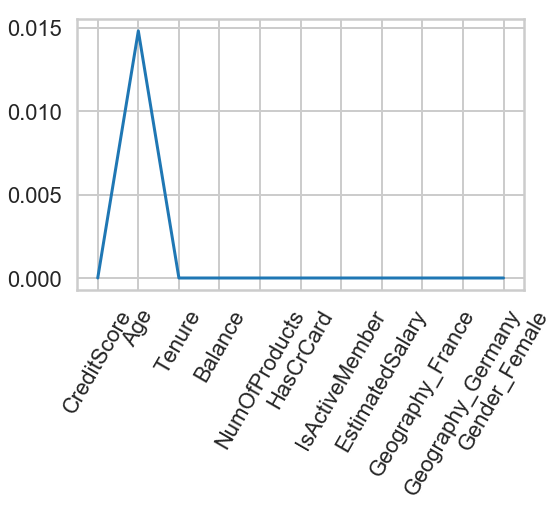

In [19]:
from sklearn.linear_model import Lasso
names = df.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)-1), lasso_coef)
plt.xticks(range(len(names)-1), names, rotation=60)

# Experimental:

Most important features in descending order:

Age, IsActiveMember, Geography, Gender, Balance, Tenure, CreditScore, NumOfProducts, HasCrCard, EstimatedSalary

# Applying:

In [20]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Gender_Female']]
y = df['Exited']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

## Logistic Regression:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_pred, y_test)

0.803

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y, cv=5)

array([0.8125937 , 0.8115    , 0.808     , 0.8185    , 0.80390195])

In [24]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=5, scoring='accuracy')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8151428571428572
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [25]:
accuracy_score(logreg_cv.predict(X_test), y_test)

0.802

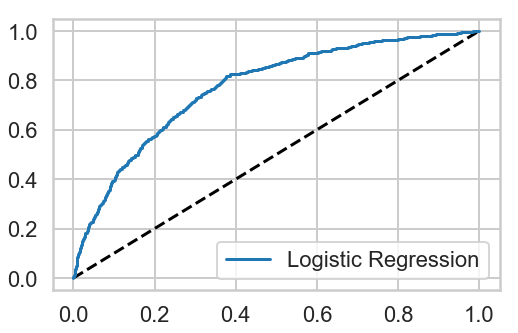

In [26]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.legend()

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.7739616045643491

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2363
           1       0.60      0.20      0.30       637

   micro avg       0.80      0.80      0.80      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.77      0.80      0.76      3000



## kNN:

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
accuracy_score(knn.predict(X_test), y_test)

0.821

In [30]:
cross_val_score(knn, X, y, cv=5)

array([0.8185907 , 0.841     , 0.8225    , 0.832     , 0.82741371])

In [31]:
knn = KNeighborsClassifier()
k_grid={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn, k_grid,cv=5, scoring='accuracy')
knn_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print(knn_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 15}
accuracy : 0.8375714285714285
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')


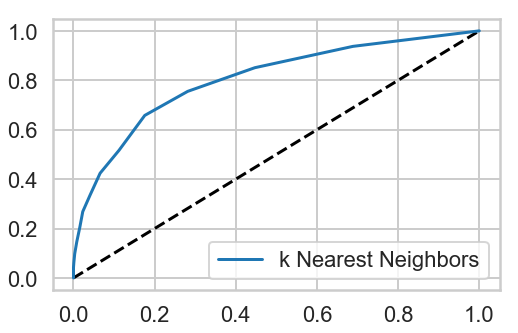

In [32]:
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='k Nearest Neighbors')
plt.legend()

In [33]:
roc_auc_score(y_test, y_pred_prob)

0.803187019135269

In [34]:
print(classification_report(y_test, knn_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2363
           1       0.76      0.27      0.40       637

   micro avg       0.83      0.83      0.83      3000
   macro avg       0.80      0.62      0.65      3000
weighted avg       0.82      0.83      0.79      3000



## SVM with 'rbf' Kernal:

In [124]:
from sklearn.svm import SVC

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma': gammas,'kernel': ['rbf'], 'probability':[True]}

SVM_rbf_cv = GridSearchCV(SVC(), param_grid, cv=3)
SVM_rbf_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_rbf_cv.best_params_)
print("accuracy :",SVM_rbf_cv.best_score_)
print(SVM_rbf_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accuracy : 0.8588571428571429
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


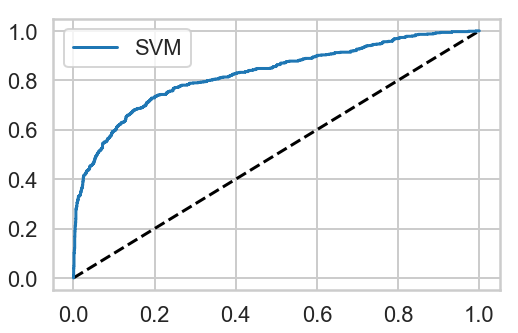

In [125]:
y_pred_prob = SVM_rbf_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [126]:
roc_auc_score(y_test, y_pred_prob)

0.8250912982791346

In [127]:
print(classification_report(y_test, SVM_rbf_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2363
           1       0.82      0.38      0.51       637

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.83      0.68      0.71      3000
weighted avg       0.85      0.85      0.83      3000



## SVM with 'poly' Kernal

In [45]:
"""from sklearn.svm import SVC

Cs = [0.1, 1, 10]
gammas = [.01, 0.1, 1]

param_grid = {'C': Cs, 'gamma': gammas,'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_poly_cv = GridSearchCV(SVC(), param_grid, cv=3)
SVM_poly_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_poly_cv.best_params_)
print("accuracy :",SVM_poly_cv.best_score_)
print(SVM_poly_cv.best_estimator_)"""

'from sklearn.svm import SVC\n\nCs = [0.1, 1, 10]\ngammas = [.01, 0.1, 1]\n\nparam_grid = {\'C\': Cs, \'gamma\': gammas,\'probability\':[True],\'kernel\': [\'poly\'],\'degree\':[2,3] }\nSVM_poly_cv = GridSearchCV(SVC(), param_grid, cv=3)\nSVM_poly_cv.fit(X_train,y_train)\n\nprint("tuned hpyerparameters :(best parameters) ",SVM_poly_cv.best_params_)\nprint("accuracy :",SVM_poly_cv.best_score_)\nprint(SVM_poly_cv.best_estimator_)'

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 1, 10]

param_grid = {'C': Cs, 'gamma': gammas,'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_poly_cv = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, n_iter = 100, cv = 3, random_state=51, n_jobs = -1)
SVM_poly_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_poly_cv.best_params_)
print("accuracy :",SVM_poly_cv.best_score_)
print(SVM_poly_cv.best_estimator_)

C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
y_pred_prob = SVM_poly_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
print(classification_report(y_test, SVM_poly_cv.predict(X_test)))

## Random Forest

In [47]:
"""from sklearn.ensemble import RandomForestClassifier

n_est = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
m_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
min_samp = [3, 5, 6, 7, 10]
m_ftr = ['auto', 'sqrt']

param_grid = {'max_depth': m_depth, 'max_features': m_ftr,'n_estimators': n_est,'min_samples_split': min_samp}
RF_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
RF_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :",RF_cv.best_score_)
print(RF_cv.best_estimator_)"""

'from sklearn.ensemble import RandomForestClassifier\n\nn_est = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]\nm_depth = [int(x) for x in np.linspace(5, 50, num = 5)]\nmin_samp = [3, 5, 6, 7, 10]\nm_ftr = [\'auto\', \'sqrt\']\n\nparam_grid = {\'max_depth\': m_depth, \'max_features\': m_ftr,\'n_estimators\': n_est,\'min_samples_split\': min_samp}\nRF_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)\nRF_cv.fit(X_train,y_train)\n\nprint("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)\nprint("accuracy :",RF_cv.best_score_)\nprint(RF_cv.best_estimator_)'

In [44]:
m_depth = [3, 5, 6, 7, 8, 10]
m_ftr = [2,4,6,7,8,9,10]
n_est = [50, 100, 150]
min_samp = [3, 5, 6, 7, 10]

param_grid = {'max_depth': m_depth, 'max_features': m_ftr,'n_estimators': n_est,'min_samples_split': min_samp}
RF_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
RF_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :",RF_cv.best_score_)
print(RF_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'max_features': 4, 'min_samples_split': 6, 'n_estimators': 150}
accuracy : 0.8648571428571429
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [ ]:
y_pred_prob = SVM_poly_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
print(classification_report(y_test, SVM_poly_cv.predict(X_test)))

## Naive Bayes:

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_m = GaussianNB()
nb_m.fit(X_train,y_train)
y_pred = nb_m.predict(X_test)
accuracy_score(y_pred, y_test)

0.8133333333333334

In [40]:
y_pred_prob = nb_m.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.7847260653016048

In [41]:
print(classification_report(y_test, nb_m.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2363
           1       0.60      0.36      0.45       637

   micro avg       0.81      0.81      0.81      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.79      0.81      0.79      3000



## Extreme Gradient boosting:

In [ ]:
from xgboost import XGBClassifier

m_dep = [5,6,7,8]
gammas = [0.01,0.001,0.001]
min_c_wt = [1,5,10]
l_rate = [0.05,0.1, 0.2, 0.3]
n_est = [5,10,20,100]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

xgb_cv = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)